<b><font size='3'>Importing Packages</font></b>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.utils import class_weight
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, average_precision_score, log_loss, f1_score, matthews_corrcoef, confusion_matrix, classification_report

from tensorflow.keras.optimizers import Adam

<b><font size='3'>Reading Dataset</font></b>

In [2]:
df = pd.read_csv('Support_Data_Raw.csv')

<b><font size='3'>Analysis 1 - Identified Unnecessary Columns & Missing Values</font></b>

In [3]:
df.iloc[:, :15]

Case Owner  Case Number                            Subject  \
0          Mohammed Zahid        33338                     Updated record   
1          Mohammed Zahid        33338                     Updated record   
2          Mohammed Zahid        33338                     Updated record   
3         Chelsea Stanley        65547  System allows duplicate NI number   
4         Chelsea Stanley        65547  System allows duplicate NI number   
...                   ...          ...                                ...   
303378       Tim Flathers       189792       Added users cant access rec+   
303379     Mark Davenport       191724                          ADDE Logs   
303380     Mark Davenport       191724                          ADDE Logs   
303381     Mark Davenport       191724                          ADDE Logs   
303382  Ainars Sablovskis       192692                ADDE Process Failed   

          Status               Case Reason   Account Owner       Asset Name  \
0       Resolved        Unable to Recreate  Matthew Ashton  IRIS Cascade HR   
1       Resolved        Unable to Recreate  Matthew Ashton  IRIS Cascade HR   
2       Resolved        Unable to Recreate  Matthew Ashton  IRIS Cascade HR   
3         Closed             User Guidance  Mike Blackburn  IRIS Cascade HR   
4         Closed             User Guidance  Mike Blackburn  IRIS Cascade HR   
...          ...                       ...             ...              ...   
303378    Closed      Resolved by Customer  Matthew Ashton      Core Module   
303379    Closed  Outside Scope of Support    Laura Cooper      Core Module   
303380    Closed  Outside Scope of Support    Laura Cooper      Core Module   
303381    Closed  Outside Scope of Support    Laura Cooper      Core Module   
303382    Closed            User Education    Laura Cooper      Core Module   

       Case Origin Case Record Type  Public Case Commented  \
0            Email         Incident                      1   
1            Email         Incident                      1   
2            Email         Incident                      1   
3            Phone          Problem                      0   
4            Phone          Problem                      1   
...            ...              ...                    ...   
303378   Community         Incident                      1   
303379   Community  Service Request                      1   
303380   Community  Service Request                      1   
303381   Community  Service Request                      1   
303382   Community         Incident                      1   

       Case Comment Created By  Age (Days) Priority  Escalated  Email Opt Out  
0           Matthew Betteridge         903       P3          0              1  
1               Mohammed Zahid         903       P3          0              1  
2              Lewis Pickering         903       P3          0              1  
3              Chelsea Stanley          37       P3          0              0  
4              Chelsea Stanley          37       P3          0              0  
...                        ...         ...      ...        ...            ...  
303378            Tim Flathers          17       P3          0              0  
303379          Mark Davenport           8       P3          0              0  
303380          Mark Davenport           8       P3          0              0  
303381            Deborah Jupe           8       P3          0              0  
303382       Ainars Sablovskis          11       P3          0              0  

[303383 rows x 15 columns]

In [4]:
df.iloc[:, 15:30]

Do Not Call Change of Owner L1-L2 Change of Owner L2-L3  \
0                 0                   NaN                   NaN   
1                 0                   NaN                   NaN   
2                 0                   NaN                   NaN   
3                 0                   NaN                   NaN   
4                 0                   NaN                   NaN   
...             ...                   ...                   ...   
303378            0                   NaN                   NaN   
303379            0                   NaN                   NaN   
303380            0                   NaN                   NaN   
303381            0                   NaN                   NaN   
303382            0                   NaN                   NaN   

                             Last Campaign ID  Subscription Term  \
0                  FY23m-HCM-TPG-QUTM-LegalTP               12.0   
1                  FY23m-HCM-TPG-QUTM-LegalTP               12.0   
2                  FY23m-HCM-TPG-QUTM-LegalTP               12.0   
3                   FY23m-HCM-Honch-NonProfit               12.0   
4                   FY23m-HCM-Honch-NonProfit               12.0   
...                                       ...                ...   
303378                                    NaN               12.0   
303379  FY21ch-Q2-Sept-BD-Cascade-NewApproach               12.0   
303380  FY21ch-Q2-Sept-BD-Cascade-NewApproach               12.0   
303381  FY21ch-Q2-Sept-BD-Cascade-NewApproach               12.0   
303382  FY21ch-Q2-Sept-BD-Cascade-NewApproach               12.0   

       Subscription Type Price Currency    Price        Industry  \
0              Renewable            GBP  3783.94  Not For Profit   
1              Renewable            GBP  3783.94  Not For Profit   
2              Renewable            GBP  3783.94  Not For Profit   
3              Renewable            GBP  8820.00      Technology   
4              Renewable            GBP  8820.00      Technology   
...                  ...            ...      ...             ...   
303378         Renewable            GBP  9000.00           Legal   
303379         Renewable            GBP     0.00         Housing   
303380         Renewable            GBP     0.00         Housing   
303381         Renewable            GBP     0.00         Housing   
303382         Renewable            GBP     0.00         Housing   

        VIP Customer Customer Success Manager     Category  \
0                  0                      NaN        Other   
1                  0                      NaN        Other   
2                  0                      NaN        Other   
3                  1                      NaN          NaN   
4                  1                      NaN          NaN   
...              ...                      ...          ...   
303378             1                      NaN  Core Module   
303379             1                      NaN  Core Module   
303380             1                      NaN  Core Module   
303381             1                      NaN  Core Module   
303382             1                      NaN  Core Module   

                 Parent Product          Brand Opened Date  
0       IRIS Cascade Enterprise            NaN    7/1/2021  
1       IRIS Cascade Enterprise            NaN    7/1/2021  
2       IRIS Cascade Enterprise            NaN    7/1/2021  
3       IRIS Cascade Enterprise            NaN  26/07/2021  
4       IRIS Cascade Enterprise            NaN  26/07/2021  
...                         ...            ...         ...  
303378  IRIS Cascade Enterprise  Recruitment +  15/11/2022  
303379  IRIS Cascade Enterprise  Recruitment +  22/11/2022  
303380  IRIS Cascade Enterprise  Recruitment +  22/11/2022  
303381  IRIS Cascade Enterprise  Recruitment +  22/11/2022  
303382  IRIS Cascade Enterprise  Recruitment +  24/11/2022  

[303383 rows x 15 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303383 entries, 0 to 303382
Data columns (total 30 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Case Owner                303383 non-null  object 
 1   Case Number               303383 non-null  int64  
 2   Subject                   303289 non-null  object 
 3   Status                    303383 non-null  object 
 4   Case Reason               287840 non-null  object 
 5   Account Owner             303374 non-null  object 
 6   Asset Name                303383 non-null  object 
 7   Case Origin               303383 non-null  object 
 8   Case Record Type          303383 non-null  object 
 9   Public Case Commented     303383 non-null  int64  
 10  Case Comment Created By   295946 non-null  object 
 11  Age (Days)                303383 non-null  int64  
 12  Priority                  303383 non-null  object 
 13  Escalated                 303383 non-null  i

In [6]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_summary = pd.DataFrame({'Missing Count': missing_values, 'Missing Percentage': missing_percentage})
missing_summary = missing_summary[missing_summary['Missing Count'] > 0].sort_values(by='Missing Percentage', ascending = False)

print("Missing Values Summary:")
print(missing_summary)

Missing Values Summary:
                          Missing Count  Missing Percentage
Customer Success Manager         287618           94.803598
Change of Owner L2-L3            258168           85.096396
Change of Owner L1-L2            238714           78.684040
Subscription Term                189834           62.572392
Last Campaign ID                  55239           18.207678
Case Reason                       15543            5.123227
Industry                          11867            3.911557
Case Comment Created By            7437            2.451357
Subject                              94            0.030984
Category                             53            0.017470
Brand                                29            0.009559
Account Owner                         9            0.002967


In [7]:
df.select_dtypes(include = 'object').nunique().sort_values(ascending = False)

Subject                     47045
Case Comment Created By      2877
Opened Date                  1011
Case Owner                    146
Last Campaign ID              104
Account Owner                  54
Category                       50
Industry                       38
Case Reason                    28
Asset Name                     27
Status                          7
Case Record Type                5
Priority                        5
Change of Owner L2-L3           5
Brand                           5
Change of Owner L1-L2           5
Case Origin                     4
Customer Success Manager        4
Subscription Type               2
Price Currency                  1
Parent Product                  1
dtype: int64

<b><font size='3'>Data Cleaning 1 - Removed Unnecessary Columns & Duplicates</font></b>

In [8]:
drop_col = ['Case Number', 'Case Comment Created By', 'Public Case Commented',
            'Customer Success Manager', 'Change of Owner L1-L2', 'Change of Owner L2-L3',
            'Subscription Term', 'Subscription Type',
            'Price Currency', 'Parent Product']

df = df.drop(columns = drop_col)

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.reset_index(drop=True, inplace=True)

<b><font size='3'>Data Cleaning 2 - Filled Nulls</font></b>

In [11]:
categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    df[column].fillna("Unknown", inplace=True)

<b><font size='3'>Data Cleaning 3 - Converted Date</font></b>

In [12]:
df['Opened Date'] = pd.to_datetime(df['Opened Date'], dayfirst = True)

<b><font size='3'>Analysis 2 - Data Overview</font></b>

In [13]:
df

Case Owner                                    Subject    Status  \
0         Mohammed Zahid                             Updated record  Resolved   
1        Chelsea Stanley          System allows duplicate NI number    Closed   
2          Szymon Rutyna       Error 500 when trying to use cascade  Resolved   
3          Szymon Rutyna                  Internal Server Error 500    Closed   
4      Rachael Wadsworth                         FPS not Submitting    Closed   
...                  ...                                        ...       ...   
57190     Lawrence Kweka  user hierarchy not coming through to Rec+    Closed   
57191       Dipesh Patel                              Case 00140445    Closed   
57192       Tim Flathers               Added users cant access rec+    Closed   
57193     Mark Davenport                                  ADDE Logs    Closed   
57194  Ainars Sablovskis                        ADDE Process Failed    Closed   

                     Case Reason         Account Owner            Asset Name  \
0             Unable to Recreate        Matthew Ashton       IRIS Cascade HR   
1                  User Guidance        Mike Blackburn       IRIS Cascade HR   
2            Resolution Provided  Lorraine Fitzpatrick       IRIS Cascade HR   
3            Resolution Provided          Laura Cooper            Cascade HR   
4            Resolution Provided         Kerry Haworth  IRIS Cascade Payroll   
...                          ...                   ...                   ...   
57190  No Response from Customer        Matthew Ashton               Tableau   
57191             User Education  Lorraine Fitzpatrick           Core Module   
57192       Resolved by Customer        Matthew Ashton           Core Module   
57193   Outside Scope of Support          Laura Cooper           Core Module   
57194             User Education          Laura Cooper           Core Module   

      Case Origin Case Record Type  Age (Days) Priority  Escalated  \
0           Email         Incident         903       P3          0   
1           Phone          Problem          37       P3          0   
2           Phone          Problem         647       P1          0   
3           Phone          Problem         184       P1          0   
4           Phone          Problem         574       P2          0   
...           ...              ...         ...      ...        ...   
57190       Phone         Incident          50       P3          0   
57191        Chat         Incident           7       P3          0   
57192   Community         Incident          17       P3          0   
57193   Community  Service Request           8       P3          0   
57194   Community         Incident          11       P3          0   

       Email Opt Out  Do Not Call                       Last Campaign ID  \
0                  1            0             FY23m-HCM-TPG-QUTM-LegalTP   
1                  0            0              FY23m-HCM-Honch-NonProfit   
2                  0            0  FY21ch-Q2-Sept-BD-Cascade-NewApproach   
3                  0            0        FY22m-HCM-WBN-TheBigResignation   
4                  0            0  FY21ch-Q2-Sept-BD-Cascade-NewApproach   
...              ...          ...                                    ...   
57190              1            0  FY21ch-Q2-Sept-BD-Cascade-NewApproach   
57191              0            0                  FY23m-HCM-QlearsiteTP   
57192              0            0                                Unknown   
57193              0            0  FY21ch-Q2-Sept-BD-Cascade-NewApproach   
57194              0            0  FY21ch-Q2-Sept-BD-Cascade-NewApproach   

         Price                       Industry  VIP Customer  \
0      3783.94                 Not For Profit             0   
1      8820.00                     Technology             1   
2      2699.10                  Manufacturing             0   
3         0.00                Health Services             1   
4       760

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57195 entries, 0 to 57194
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Case Owner        57195 non-null  object        
 1   Subject           57195 non-null  object        
 2   Status            57195 non-null  object        
 3   Case Reason       57195 non-null  object        
 4   Account Owner     57195 non-null  object        
 5   Asset Name        57195 non-null  object        
 6   Case Origin       57195 non-null  object        
 7   Case Record Type  57195 non-null  object        
 8   Age (Days)        57195 non-null  int64         
 9   Priority          57195 non-null  object        
 10  Escalated         57195 non-null  int64         
 11  Email Opt Out     57195 non-null  int64         
 12  Do Not Call       57195 non-null  int64         
 13  Last Campaign ID  57195 non-null  object        
 14  Price             5719

In [15]:
df.describe()

Age (Days)     Escalated  Email Opt Out   Do Not Call         Price  \
count  57195.000000  57195.000000   57195.000000  57195.000000  57195.000000   
mean     166.863957      0.007728       0.107614      0.001836   1135.631130   
std      307.962156      0.087569       0.309895      0.042808   2476.173989   
min        0.000000      0.000000       0.000000      0.000000  -3703.000000   
25%        7.000000      0.000000       0.000000      0.000000      0.000000   
50%       14.000000      0.000000       0.000000      0.000000      0.000000   
75%       74.000000      0.000000       0.000000      0.000000   1697.580000   
max     1618.000000      1.000000       1.000000      1.000000  41197.750000   

       VIP Customer  
count  57195.000000  
mean       0.147058  
std        0.354167  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

In [16]:
df.select_dtypes(include = 'object').nunique().sort_values(ascending = False)

Subject             47045
Case Owner            146
Last Campaign ID      105
Account Owner          55
Category               51
Industry               39
Case Reason            29
Asset Name             27
Status                  7
Brand                   6
Case Record Type        5
Priority                5
Case Origin             4
dtype: int64

In [17]:
def plot_top_frequent_v1(column, n = 10):
    top_items = df[column].value_counts().head(n)
    
    plt.figure(figsize=(10, 4))
    ax = sns.barplot(x = top_items.values, y = top_items.index, orient = 'h', palette = 'flare')
    ax.set_title(f'Top {n} Frequent {column}')
    ax.set_xlabel('Count')
    ax.set_ylabel(column)
    
    for p in ax.patches:
        ax.annotate(f"{p.get_width():.0f}", (p.get_width(), p.get_y() + p.get_height() / 2),
                    ha = 'right', va = 'center', xytext = (-5, 0), textcoords = 'offset points')
    
    plt.tight_layout()
    plt.show()

In [18]:
def plot_top_frequent_v2(column, n = 10):
    top_items = df[column].value_counts().head(n)
    
    plt.figure(figsize=(10, 4))
    ax = sns.barplot(x = top_items.values, y = top_items.index, orient = 'h', palette = 'flare')
    ax.set_title(f'Top {n} Frequent {column}')
    ax.set_xlabel('Count')
    ax.set_ylabel(column)
    
    for p in ax.patches:
        ax.annotate(f"{p.get_width():.0f}", (p.get_width(), p.get_y() + p.get_height() / 2),
                    ha = 'left', va = 'center', xytext = (2, 0), textcoords = 'offset points')
    
    plt.tight_layout()
    plt.show()

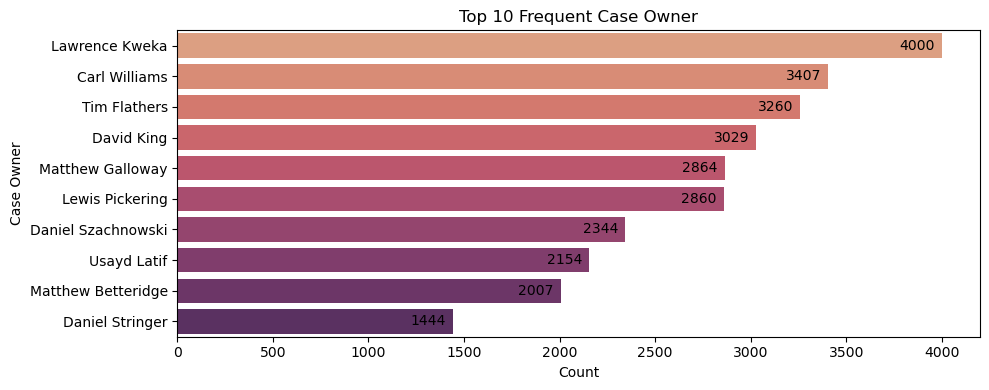

In [19]:
plot_top_frequent_v1('Case Owner', 10)

In [20]:
df_resolved = df[df['Status'] == 'Resolved']

In [21]:
def plot_cases_by_owner(df, column_name, num_top_values=3):
    num_case_owners = len(df['Case Owner'].unique())
    num_cols = 3
    num_rows = -(-num_case_owners // num_cols)

    sorted_case_owners = df.groupby('Case Owner')[column_name].count().sort_values(ascending=False).index

    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5*num_rows))
    axes_flat = axes.flatten()

    for idx, (case_owner, ax) in enumerate(zip(sorted_case_owners, axes_flat)):
        case_owner_data = df[df['Case Owner'] == case_owner]
        top_values = case_owner_data[column_name].value_counts().head(num_top_values).index

        sns.countplot(data=case_owner_data[case_owner_data[column_name].isin(top_values)], x=column_name, ax=ax,
                      order=top_values, palette='flare')
        ax.set_title(f"Resolved Cases for Case Owner: {case_owner}")
        ax.set_xlabel(column_name)
        ax.set_ylabel("Count")
        ax.tick_params(axis='x', rotation=45)
        ax.set_ylim(0, case_owner_data.shape[0])

        for p in ax.patches:
            ax.annotate(f'{int(p.get_height())}',
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', xytext=(0, 5), textcoords='offset points')

    for i in range(len(sorted_case_owners), len(axes_flat)):
        axes_flat[i].axis('off')

    plt.tight_layout()
    plt.show()

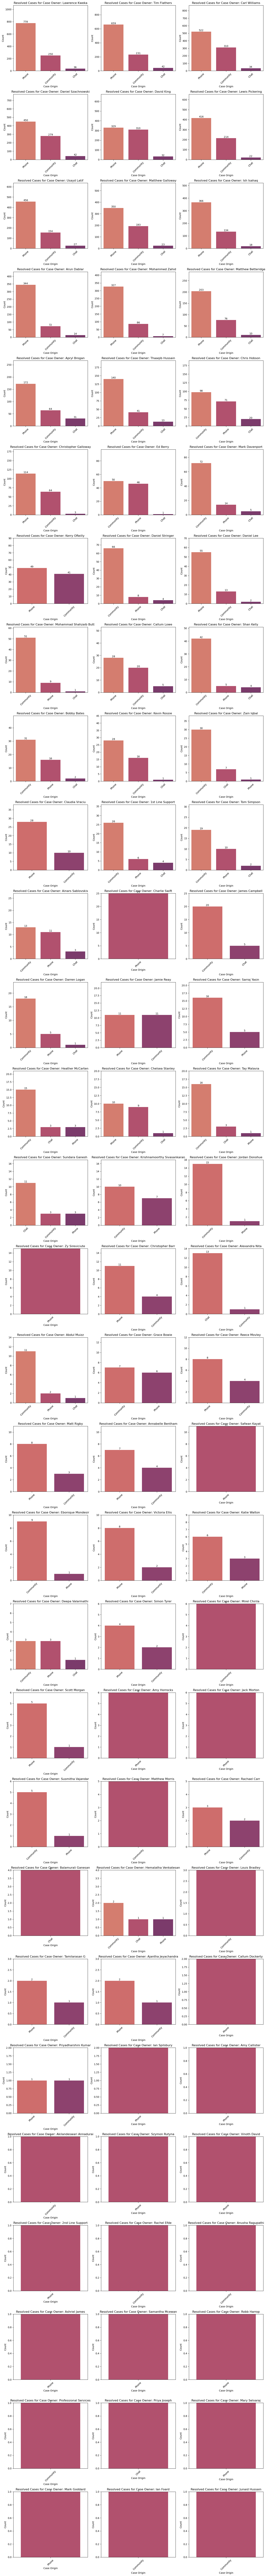

In [22]:
plot_cases_by_owner(df_resolved, 'Case Origin')

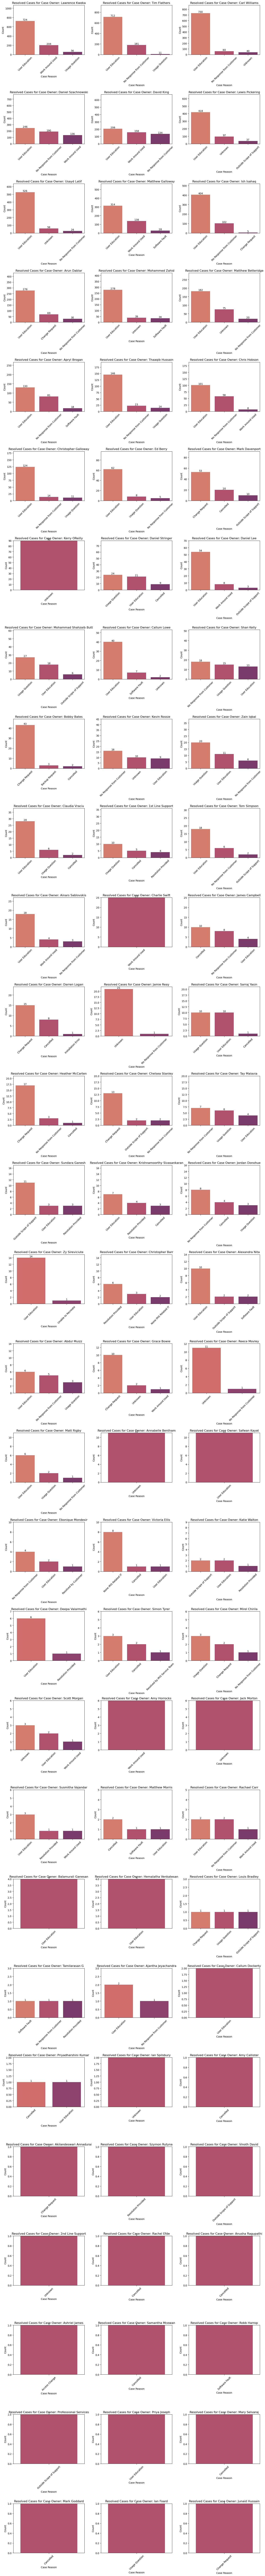

In [23]:
plot_cases_by_owner(df_resolved, 'Case Reason')

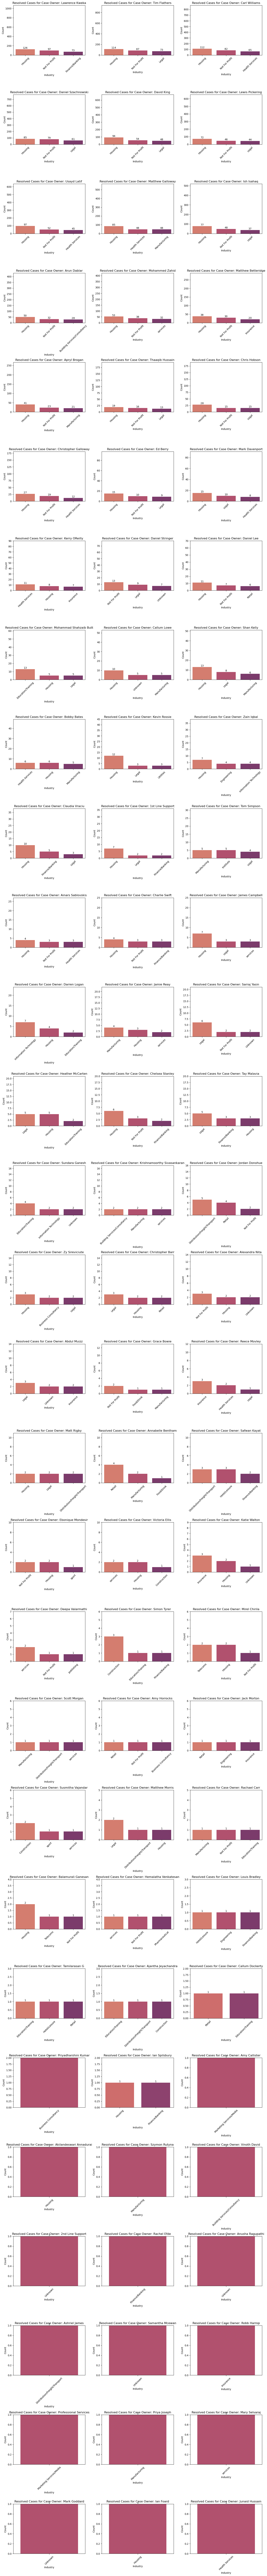

In [24]:
plot_cases_by_owner(df_resolved, 'Industry')

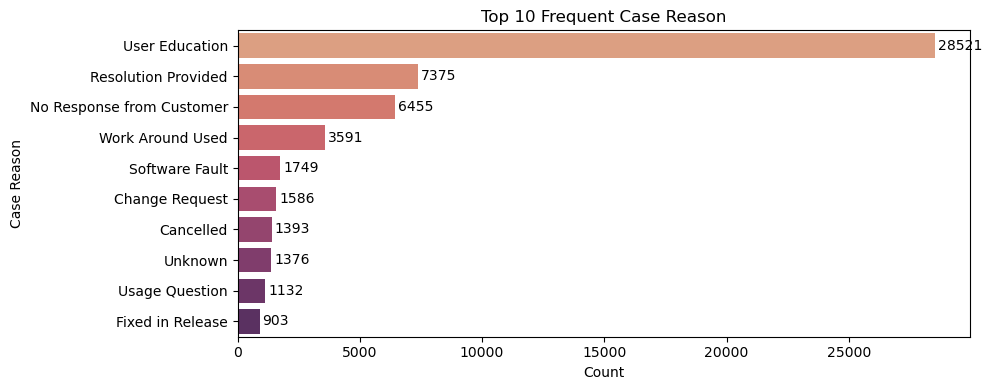

In [25]:
plot_top_frequent_v2('Case Reason', 10)

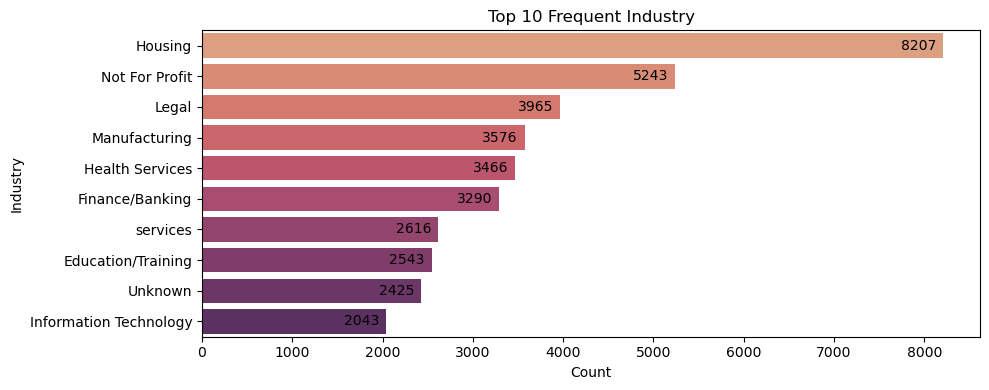

In [26]:
plot_top_frequent_v1('Industry', 10)

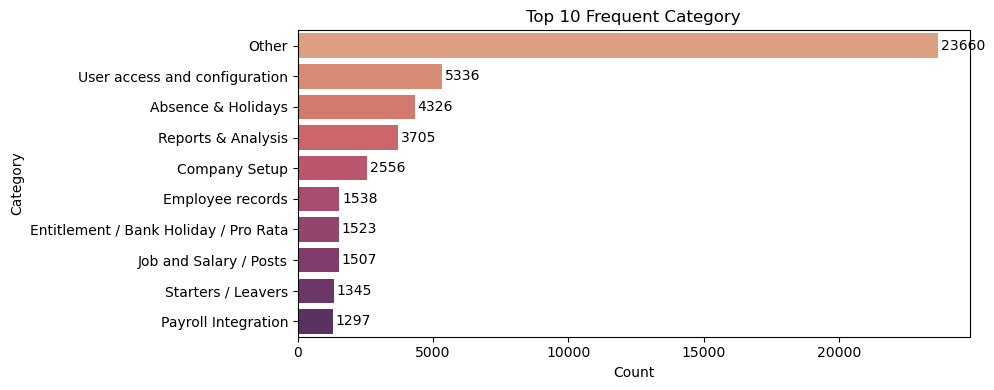

In [27]:
plot_top_frequent_v2('Category', 10)

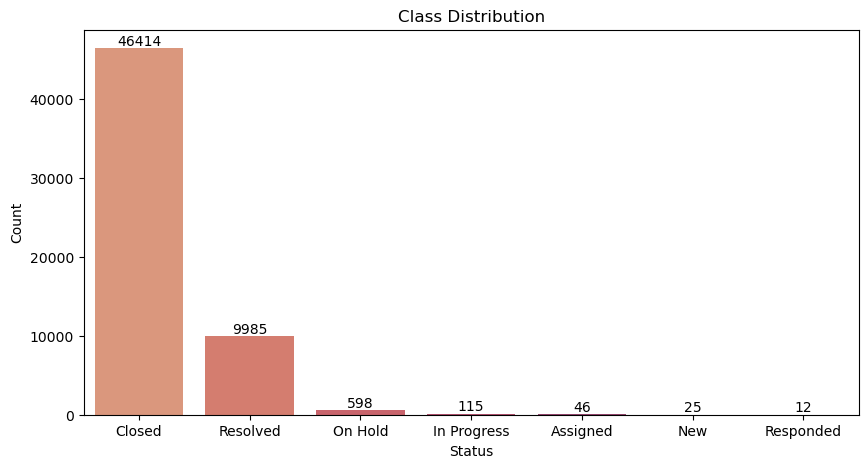

In [28]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(data = df, x = 'Status', order = df['Status'].value_counts().index, palette = 'flare')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.title("Class Distribution")
plt.xlabel("Status")
plt.ylabel("Count")

plt.show()

In [29]:
num_analysis = df.select_dtypes(include = ['int64', 'float64']).columns

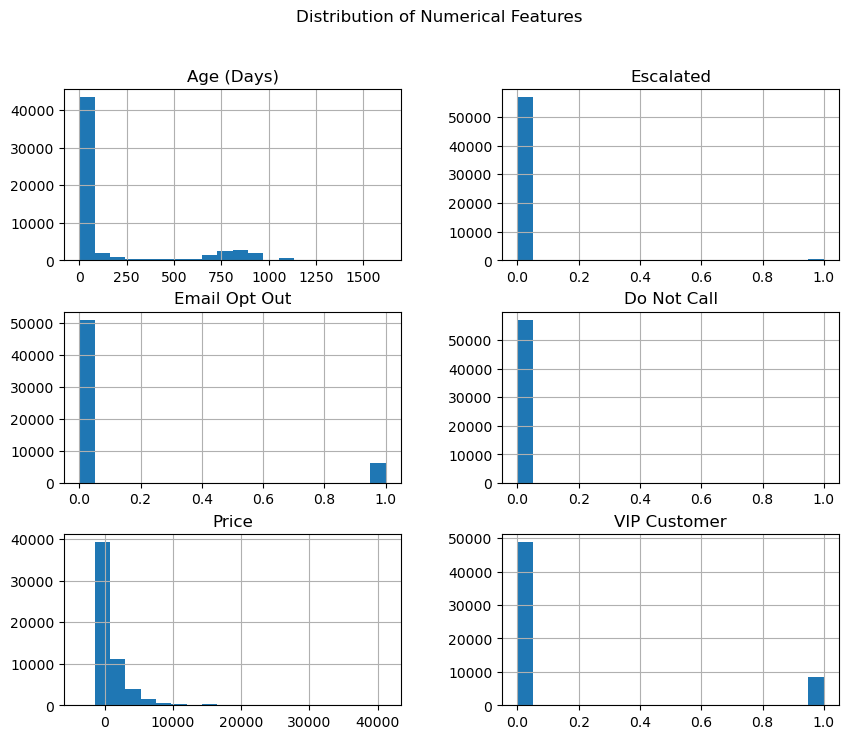

In [30]:
df[num_analysis].hist(bins = 20, figsize = (10, 8))
plt.suptitle("Distribution of Numerical Features")
plt.show()

In [31]:
binary_col = ['Escalated', 'Email Opt Out', 'Do Not Call', 'VIP Customer']

In [32]:
for column in binary_col:
    counts = df[column].value_counts()
    print(f"Counts for {column}:\n{counts}\n")

Counts for Escalated:
0    56753
1      442
Name: Escalated, dtype: int64

Counts for Email Opt Out:
0    51040
1     6155
Name: Email Opt Out, dtype: int64

Counts for Do Not Call:
0    57090
1      105
Name: Do Not Call, dtype: int64

Counts for VIP Customer:
0    48784
1     8411
Name: VIP Customer, dtype: int64



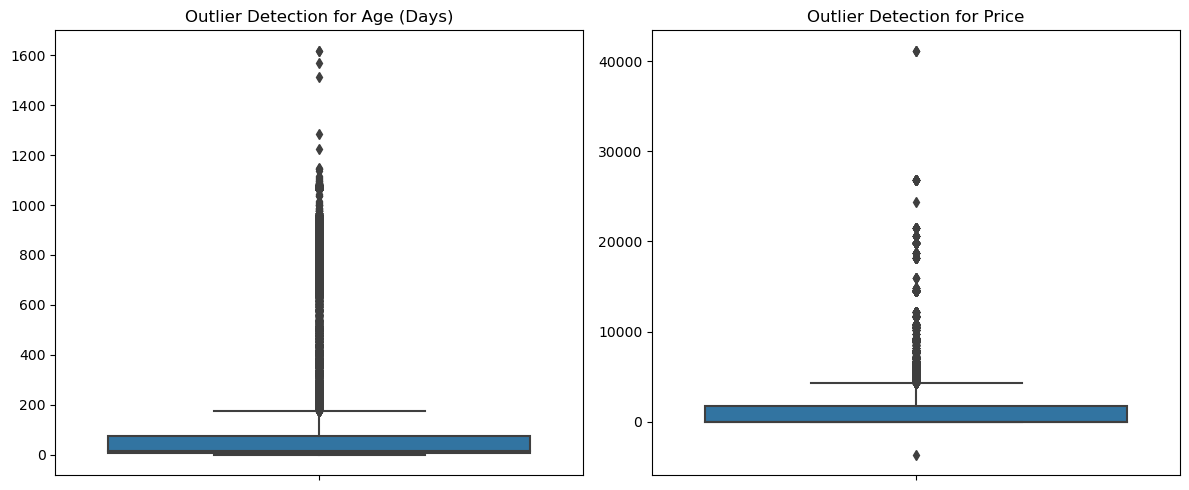

In [33]:
feature_outlier = ['Age (Days)', 'Price']

num_plots = len(feature_outlier)
num_cols = 2
num_rows = -(-num_plots // num_cols)

fig, axes = plt.subplots(nrows=num_rows, ncols = num_cols, figsize = (12, 5 * num_rows))

axes_flat = axes.flatten()

for idx, (column, ax) in enumerate(zip(feature_outlier, axes_flat)):
    sns.boxplot(data = df, y = column, ax = ax)
    ax.set_title(f"Outlier Detection for {column}")
    ax.set_ylabel('')
    ax.tick_params(axis = 'x', rotation=45)
    
for i in range(num_plots, len(axes_flat)):
    axes_flat[i].axis('off')

plt.tight_layout()
plt.show()

In [34]:
# Identify the 'Age' Outlier

df.sort_values(by = 'Age (Days)', ascending=False).head(5)

Case Owner                                            Subject  \
13     Mirel Chirila                                   New Payroll user   
12      Darren Logan                                    GL Codes upload   
15  1st Line Support  Shared Parental Leave weeks not pulling throug...   
17     Kerry OReilly                          Reports spec and building   
68    Mark Davenport                                     PAY: P45 Error   

      Status                Case Reason         Account Owner  \
13    Closed  No Response from Customer          Laura Cooper   
12    Closed             Software Fault         John Langrick   
15  Resolved                    Unknown  Lorraine Fitzpatrick   
17  Resolved                    Unknown  Lorraine Fitzpatrick   
68   On Hold                    Unknown        Matthew Ashton   

              Asset Name Case Origin Case Record Type  Age (Days) Priority  \
13       IRIS Cascade HR       Phone         Incident        1618       P4   
12            Cascade HR       Phone         Incident        1617       P3   
15            Cascade HR   Community         Incident        1567       P3   
17          Self Service       Phone         Incident        1511       P4   
68  IRIS Cascade Payroll       Phone         Incident        1284       P3   

    Escalated  Email Opt Out  Do Not Call  \
13          0              0            0   
12          0              0            0   
15          0              0            0   
17          0              0            0   
68          0              0            0   

                         Last Campaign ID    Price      Industry  \
13  FY21ch-Q2-Sept-BD-Cascade-NewApproach  5738.18  Construction   
12                                Unknown     0.00       Housing   
15                                Unknown     0.00      services   
17                                Unknown  2129.96        Retail   
68  FY21ch-Q2-Sept-BD-Cascade-NewApproach  1817.55    Food/Drink   

    VIP Customer          Category         Brand Opened Date  
13             1             Other  IRIS Cascade  2017-06-26  
12             0  Employee records  IRIS Cascade  2017-06-26  
15             0             Other  IRIS Cascade  2019-03-15  
17             0          Profiles  IRIS Cascade  2019-05-10  
68             0  Employee records  IRIS Cascade  2019-12-23

In [35]:
# Identify the 'Price' Outlier

df.sort_values(by = 'Price', ascending=False).head(5)

Case Owner                                           Subject  \
10191         Arun Dablar                          Cant login in to Cascade   
10672        Tim Flathers                                           Holiday   
12702       Mirel Chirila                    confirm log in for an employee   
17911      Mohammed Zahid  Queries regarding auto generate accounts (Azure)   
4561   Daniel Szachnowski     Web Incident: Recruitment+ not enabled in APS   

       Status          Case Reason  Account Owner       Asset Name  \
10191  Closed     Fixed in Release  John Langrick  IRIS Cascade HR   
10672  Closed       User Education  John Langrick  IRIS Cascade HR   
12702  Closed       User Education  John Langrick  IRIS Cascade HR   
17911  Closed       Software Fault    Louise Hill  IRIS Cascade HR   
4561   Closed  Resolution Provided    Louise Hill  IRIS Cascade HR   

      Case Origin Case Record Type  Age (Days) Priority  Escalated  \
10191       Phone         Incident           7       P3          0   
10672       Phone         Incident           7       P3          0   
12702       Phone         Incident          15       P3          0   
17911       Phone         Incident          10       P3          0   
4561    Community         Incident          23       P3          0   

       Email Opt Out  Do Not Call                       Last Campaign ID  \
10191              0            0       FY22m-COM-EMA-NB-HRP-BlackFriday   
10672              0            0       FY22m-COM-EMA-NB-HRP-BlackFriday   
12702              0            0       FY22m-COM-EMA-NB-HRP-BlackFriday   
17911              0            0        FY22m-COM-WBN-NB-BraxtonWebinar   
4561               1            0  FY21ch-Q2-Sept-BD-Cascade-NewApproach   

          Price         Industry  VIP Customer                       Category  \
10191  41197.75    Hotel/Leisure             0  User access and configuration   
10672  41197.75    Hotel/Leisure             0                          Other   
12702  41197.75    Hotel/Leisure             0  User access and configuration   
17911  26847.50  Finance/Banking             1  User access and configuration   
4561   26847.50  Finance/Banking             1                          Other   

              Brand Opened Date  
10191  IRIS Cascade  2020-09-10  
10672  IRIS Cascade  2020-09-04  
12702  IRIS Cascade  2020-10-05  
17911  IRIS Cascade  2020-12-21  
4561   IRIS Cascade  2020-06-01

In [36]:
num_analysis_in = df.select_dtypes(include = ['int64', 'float64'])

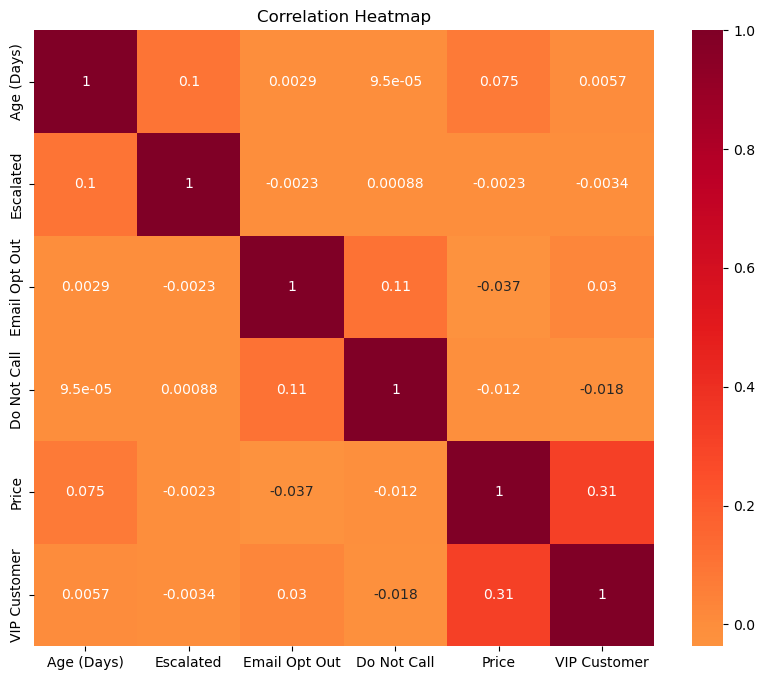

In [37]:
correlation_matrix = num_analysis_in.corr()
plt.figure(figsize = (10, 8))
sns.heatmap(correlation_matrix, annot = True, cmap = 'YlOrRd', center = 0)
plt.title('Correlation Heatmap')
plt.show()

In [38]:
correlation_threshold = 0.5

In [39]:
highly_correlated_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            pair = (correlation_matrix.columns[i], correlation_matrix.columns[j])
            highly_correlated_pairs.append(pair)

In [40]:
print("Highly Correlated Pairs:")
for pair in highly_correlated_pairs:
    print(f"{pair[0]} - {pair[1]}: {correlation_matrix.loc[pair]}")

Highly Correlated Pairs:


<b><font size='3'>Data Pre-Processing 1 - Removing Outliers</font></b>

In [41]:
df = df[df['Age (Days)'] <= 1400]

<b><font size='3'>Others 1 - Output to CSV</font></b>

In [42]:
df.to_csv('Support_Data_Cleaned.csv', index = False, header = True, mode = 'w')

<b><font size='3'>Data Pre-Processing 2 - Target Selection</font></b>

In [43]:
df = df[df['Status'] != 'Closed']

In [44]:
df_model = df.copy()

In [45]:
df_model.reset_index(drop=True, inplace=True)

In [46]:
df_model['Target'] = (df_model['Status'] == 'Resolved').astype(int)

In [47]:
df_model['Target'].value_counts()

1    9983
0     796
Name: Target, dtype: int64

In [48]:
drop_col = ['Opened Date', 'Status', 'Subject']

df_model.drop(columns = drop_col, inplace = True)

In [49]:
df_model

Case Owner          Case Reason         Account Owner  \
0        Mohammed Zahid   Unable to Recreate        Matthew Ashton   
1         Szymon Rutyna  Resolution Provided  Lorraine Fitzpatrick   
2       Chelsea Stanley  Resolution Provided          Laura Cooper   
3        Mark Davenport            Cancelled            Jon Cooper   
4          Katie Walton  Resolution Provided    Victoria Hargraves   
...                 ...                  ...                   ...   
10774   Daniel Stringer            Cancelled          Laura Cooper   
10775    Alexandra Nita       User Education         Kerry Haworth   
10776       Simon Tyrer       User Education        Matthew Ashton   
10777  1st Line Support              Unknown          Laura Cooper   
10778  3rd Line Support              Unknown  Lorraine Fitzpatrick   

             Asset Name Case Origin Case Record Type  Age (Days) Priority  \
0       IRIS Cascade HR       Email         Incident         903       P3   
1       IRIS Cascade HR       Phone          Problem         647       P1   
2      Cascade Expenses       Phone          Problem         583       P2   
3            Cascade HR       Phone          Problem         581       P2   
4            Cascade HR       Phone          Problem         374       P2   
...                 ...         ...              ...         ...      ...   
10774        Cascade HR   Community  Service Request           7       P3   
10775        Cascade HR        Chat         Incident           1       P3   
10776   Cascade Payroll       Phone         Incident           6       P3   
10777   Cascade Payroll   Community         Incident           6       P3   
10778        Cascade HR   Community         Incident           9       P3   

       Escalated  Email Opt Out  Do Not Call  \
0              0              1            0   
1              0              0            0   
2              0              0            0   
3              0              0            0   
4              0              0            0   
...          ...            ...          ...   
10774          0              0            0   
10775          0              1            0   
10776          0              1            0   
10777          0              0            0   
10778          0              0            0   

                              Last Campaign ID    Price  \
0                   FY23m-HCM-TPG-QUTM-LegalTP  3783.94   
1        FY21ch-Q2-Sept-BD-Cascade-NewApproach  2699.10   
2          FY22m-COM-WBN-CAS-EmployeeLifecycle     0.00   
3        FY21ch-Q2-Sept-BD-Cascade-NewApproach     0.00   
4                                      Unknown     0.00   
...                                        ...      ...   
10774      FY22m-COM-WBN-CAS-EmployeeLifecycle     0.00   
10775    FY21ch-Q2-Sept-BD-Cascade-NewApproach     0.00   
10776    FY21ch-Q2-Sept-BD-Cascade-NewApproach     0.00   
10777                                  Unknown     0.00   
10778  FY23m-HCM-AM-WBN-QUTM-VirtualRoadshowCS     0.00   

                     Industry  VIP Customer             Category  \
0              Not For Profit             0                Other   
1               Manufacturing             0              Unknown   
2                     Housing             1              Unknown   
3             Finance/Banking             0              Unknown   
4                   Insurance             0              Unknown   
...                       ...           ...                  ...   
10774                 Housing             1   Absence & Holidays   
10775  Information Technology             0    Data and Security   
10776            Construction             0  Payroll Integration   
10777                 Housing             1           Period End   
10778                  Retail             0                Other   

              Brand  Target  
0           Unknown       1  
1           Unknown       1  
2           Unknown       1  
3           Unknown     

In [50]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10779 entries, 0 to 10778
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Case Owner        10779 non-null  object 
 1   Case Reason       10779 non-null  object 
 2   Account Owner     10779 non-null  object 
 3   Asset Name        10779 non-null  object 
 4   Case Origin       10779 non-null  object 
 5   Case Record Type  10779 non-null  object 
 6   Age (Days)        10779 non-null  int64  
 7   Priority          10779 non-null  object 
 8   Escalated         10779 non-null  int64  
 9   Email Opt Out     10779 non-null  int64  
 10  Do Not Call       10779 non-null  int64  
 11  Last Campaign ID  10779 non-null  object 
 12  Price             10779 non-null  float64
 13  Industry          10779 non-null  object 
 14  VIP Customer      10779 non-null  int64  
 15  Category          10779 non-null  object 
 16  Brand             10779 non-null  object

<b><font size='3'>Data Pre-Processing 3 - Applied OneHotEncoder & StandardScaler</font></b>

In [51]:
# Identify the Categorical & Numerical Columns

categorical_cols = df_model.select_dtypes(include=['object']).columns
numerical_cols = ['Price', 'Age (Days)']

In [52]:
# Prepare the Feature Matrix and Target Vector for Modelling

x = pd.get_dummies(df_model.drop('Target', axis=1), columns = categorical_cols)
y = df_model['Target']

In [53]:
# Split the Data to Training & Test Sets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y, random_state = 42)

In [54]:
# Standardize the Numerical Features

scaler = StandardScaler()

x_train[numerical_cols] = scaler.fit_transform(x_train[numerical_cols])
x_test[numerical_cols] = scaler.transform(x_test[numerical_cols])

<b><font size='3'>Model Creation & Training 1</font></b>

In [55]:
# Create the Neural Network Model

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(16, input_dim = x_train.shape[1], activation = 'relu'))
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

In [56]:
# Compile the Model

model.compile(optimizer = Adam(learning_rate = 0.0005), 
              loss = 'binary_crossentropy', 
              metrics = 'accuracy')

In [57]:
# Display the Model Architecture

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                6096      
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 6113 (23.88 KB)
Trainable params: 6113 (23.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [58]:
# Compute Class Weights for Imbalanced Classes

class_weights = class_weight.compute_class_weight('balanced', classes = np.unique(y_train), y = y_train)
class_weights = dict(enumerate(class_weights))

In [59]:
# Print the Computed Class Weights

print("Class Weights:", class_weights)

Class Weights: {0: 6.768445839874412, 1: 0.5398822940145254}


In [60]:
# Train the Model on the Training Data

history = model.fit(x_train, y_train,
                    verbose = 2,
                    epochs = 20, 
                    batch_size = 320, 
                    validation_data = (x_test, y_test),
                    class_weight = class_weights)

Epoch 1/20
27/27 - 1s - loss: 0.6915 - accuracy: 0.5228 - val_loss: 0.6797 - val_accuracy: 0.5951 - 1s/epoch - 44ms/step
Epoch 2/20
27/27 - 0s - loss: 0.6063 - accuracy: 0.6608 - val_loss: 0.6369 - val_accuracy: 0.7250 - 100ms/epoch - 4ms/step
Epoch 3/20
27/27 - 0s - loss: 0.5358 - accuracy: 0.7887 - val_loss: 0.5747 - val_accuracy: 0.8312 - 125ms/epoch - 5ms/step
Epoch 4/20
27/27 - 0s - loss: 0.4682 - accuracy: 0.8736 - val_loss: 0.5024 - val_accuracy: 0.8868 - 116ms/epoch - 4ms/step
Epoch 5/20
27/27 - 0s - loss: 0.4051 - accuracy: 0.9092 - val_loss: 0.4322 - val_accuracy: 0.9170 - 116ms/epoch - 4ms/step
Epoch 6/20
27/27 - 0s - loss: 0.3496 - accuracy: 0.9301 - val_loss: 0.3741 - val_accuracy: 0.9300 - 118ms/epoch - 4ms/step
Epoch 7/20
27/27 - 0s - loss: 0.3029 - accuracy: 0.9376 - val_loss: 0.3271 - val_accuracy: 0.9341 - 113ms/epoch - 4ms/step
Epoch 8/20
27/27 - 0s - loss: 0.2638 - accuracy: 0.9424 - val_loss: 0.2845 - val_accuracy: 0.9434 - 112ms/epoch - 4ms/step
Epoch 9/20
27/27 -

<b><font size='3'>Model Evaluation 1 - Analysis of Accuracy & Loss Plots, Confusion Matrix, & Metrics</font></b>

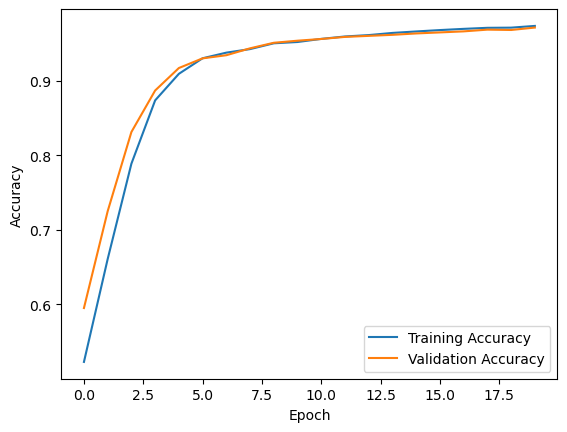

In [61]:
# Plot the Accuracy

plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

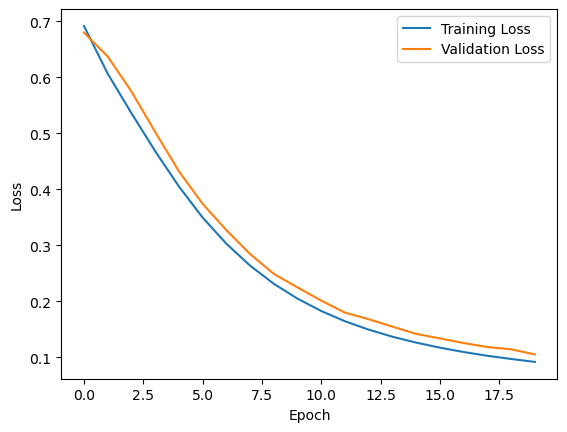

In [62]:
# Plot the Loss

plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [63]:
# Use Model to Predict

y_pred = model.predict(x_test)

68/68 [==============================] - 0s 1ms/step


In [64]:
# Convert Prediction to Binary

y_pred_binary = (y_pred > 0.5).astype(int)

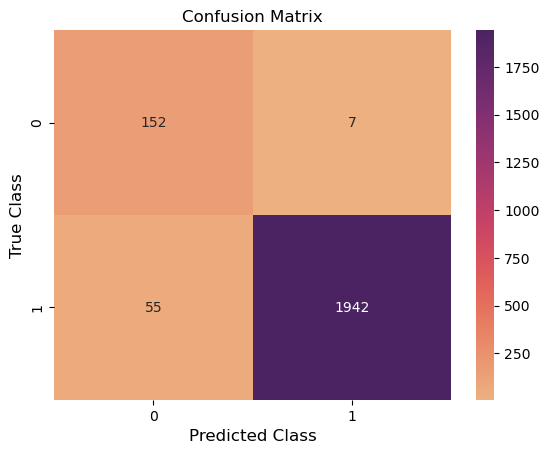

In [65]:
# Plot the Confusion Matrix

confusion_matrix = confusion_matrix(y_test, y_pred_binary)
ax = sns.heatmap(confusion_matrix, cmap = 'flare', annot = True, fmt = 'd')

plt.xlabel("Predicted Class", fontsize = 12)
plt.ylabel("True Class", fontsize = 12)
plt.title("Confusion Matrix", fontsize = 12)
plt.show()

In [66]:
# Create a Classification Report

report = classification_report(y_test, y_pred_binary)

print("Classification Report:\n")
print(report)

Classification Report:

              precision    recall  f1-score   support

           0       0.73      0.96      0.83       159
           1       1.00      0.97      0.98      1997

    accuracy                           0.97      2156
   macro avg       0.87      0.96      0.91      2156
weighted avg       0.98      0.97      0.97      2156



In [67]:
# Calculate and Round Evaluation Metrics

accuracy = round(accuracy_score(y_test, y_pred_binary), 2)
average_precision = round(average_precision_score(y_test, y_pred), 2)
log_loss_val = round(log_loss(y_test, y_pred), 2)
f1 = round(f1_score(y_test, y_pred_binary), 2)
mcc = round(matthews_corrcoef(y_test, y_pred_binary), 2)

In [68]:
# Print the Evaluation Results

print('Accuracy:', accuracy)
print('Average Precision Score:', average_precision)
print('Log Loss:', log_loss_val)
print('F1 Score:', f1)
print('Matthews Correlation Coeffiecient:', mcc)

Accuracy: 0.97
Average Precision Score: 1.0
Log Loss: 0.11
F1 Score: 0.98
Matthews Correlation Coeffiecient: 0.82


In [69]:
# Identify the Model Weights & Original Feature Names

model_weights = model.get_weights()[0]
feature_names = x.columns

In [70]:
# Calculate the Feature Importance

feature_importances = np.abs(model_weights).mean(axis=1)

In [71]:
# Sort and Select Top Features

sorted_indices = np.argsort(feature_importances)[::-1]
top_feature_indices = sorted_indices[:10]
top_feature_names = feature_names[top_feature_indices]
top_feature_importances = feature_importances[top_feature_indices]

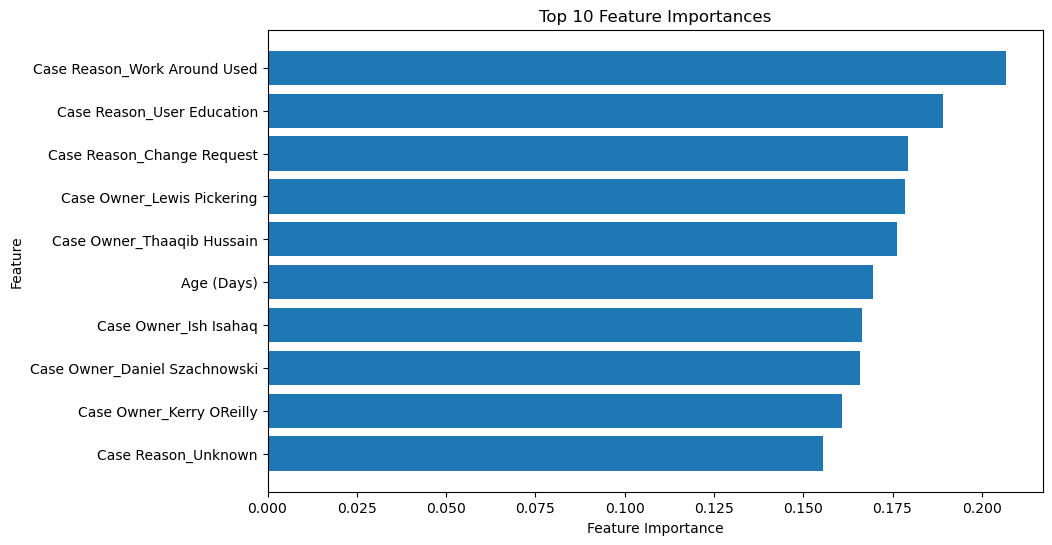

In [72]:
# Plot the Feature Importance

plt.figure(figsize = (10, 6))
plt.barh(top_feature_names[::-1], top_feature_importances[::-1])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances')
plt.show()

In [73]:
# Create a Function to Aggregate Feature Importance

def calculate_aggregated_importances(feature_names, model_weights):
    feature_mapping = {}
    for col_name in feature_names:
        original_feature = col_name.split('_')[0]
        feature_mapping.setdefault(original_feature, []).append(col_name)

    aggregated_feature_importances = []
    for original_feature, cols in feature_mapping.items():
        indices = [feature_names.get_loc(col) for col in cols]
        importance_values = np.abs(model_weights[indices]).mean(axis=0)
        aggregated_importance = np.mean(importance_values)
        aggregated_feature_importances.append((original_feature, aggregated_importance))

    return sorted(aggregated_feature_importances, key = lambda x: x[1], reverse = True)[:10]

In [74]:
# Aggregate the Binary Feature Importance

top_aggregated_feature_importances = calculate_aggregated_importances(feature_names, model_weights)
top_feature_names, top_feature_importances = zip(*top_aggregated_feature_importances)

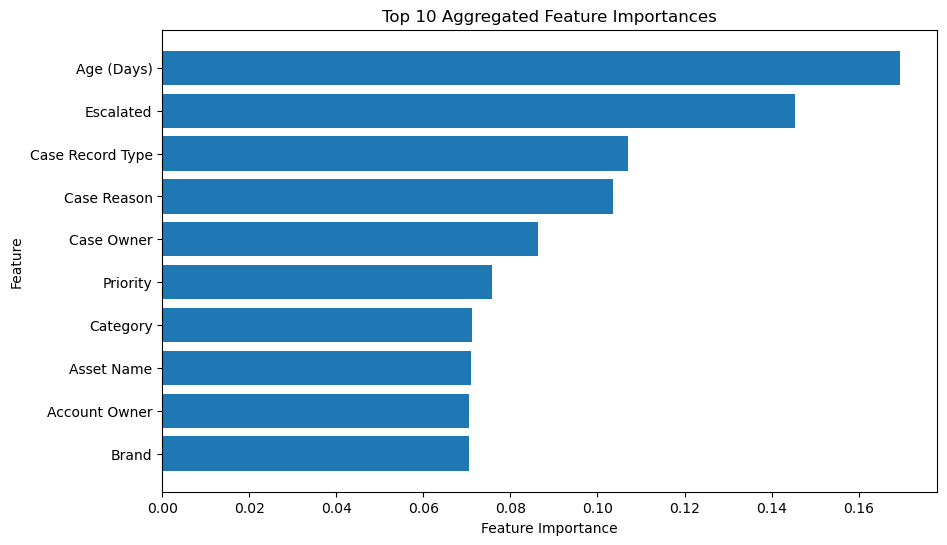

In [75]:
# Plot the Aggregated Feature Importance

plt.figure(figsize = (10, 6))
plt.barh(top_feature_names[::-1], top_feature_importances[::-1])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 10 Aggregated Feature Importances')
plt.show()

<b><font size='3'>Analysis 3 - Results & Findings</font></b>

In [76]:
df_resolved = df[df['Status'] == 'Resolved']

In [77]:
df_resolved

Case Owner  \
0              Mohammed Zahid   
2               Szymon Rutyna   
5             Chelsea Stanley   
6              Mark Davenport   
9                Katie Walton   
...                       ...   
57165          Lawrence Kweka   
57167  Mohammad Shahzaib Butt   
57174         Daniel Stringer   
57176          Alexandra Nita   
57177             Simon Tyrer   

                                                 Subject    Status  \
0                                         Updated record  Resolved   
2                   Error 500 when trying to use cascade  Resolved   
5                              Housekeeping Jobs not run  Resolved   
6      Log out Issues and general performance issues ...  Resolved   
9                                   Cascade Running Slow  Resolved   
...                                                  ...       ...   
57165                                   Workflow trigger  Resolved   
57167  Workflow trigger and tasks for new starter tra...  Resolved   
57174                                   Working patterns  Resolved   
57176  would like to enable MFA on our service we hav...  Resolved   
57177  Would like to know how to set up a court order...  Resolved   

               Case Reason         Account Owner        Asset Name  \
0       Unable to Recreate        Matthew Ashton   IRIS Cascade HR   
2      Resolution Provided  Lorraine Fitzpatrick   IRIS Cascade HR   
5      Resolution Provided          Laura Cooper  Cascade Expenses   
6                Cancelled            Jon Cooper        Cascade HR   
9      Resolution Provided    Victoria Hargraves        Cascade HR   
...                    ...                   ...               ...   
57165     Work Around Used        Robert Laycock        Cascade HR   
57167       User Education         Mark Comerton        Cascade HR   
57174            Cancelled          Laura Cooper        Cascade HR   
57176       User Education         Kerry Haworth        Cascade HR   
57177       User Education        Matthew Ashton   Cascade Payroll   

      Case Origin Case Record Type  Age (Days) Priority  Escalated  \
0           Email         Incident         903       P3          0   
2           Phone          Problem         647       P1          0   
5           Phone          Problem         583       P2          0   
6           Phone          Problem         581       P2          0   
9           Phone          Problem         374       P2          0   
...           ...              ...         ...      ...        ...   
57165       Phone         Incident           1       P3          0   
57167       Phone         Incident           6       P3          0   
57174   Community  Service Request           7       P3          0   
57176        Chat         Incident           1       P3          0   
57177       Phone         Incident           6       P3          0   

       Email Opt Out  Do Not Call                       Last Campaign ID  \
0                  1            0             FY23m-HCM-TPG-QUTM-LegalTP   
2                  0            0  FY21ch-Q2-Sept-BD-Cascade-NewApproach   
5                  0            0    FY22m-COM-WBN-CAS-EmployeeLifecycle   
6                  0            0  FY21ch-Q2-Sept-BD-Cascade-NewApproach   
9                  0            0                                Unknown   
...              ...          ...                                    ...   
57165              0            0                                Unknown   
57167              0            0                                Unknown   
57174              0            0    FY22m-COM-WBN-CAS-EmployeeLifecycle   
57176              1            0  FY21ch-Q2-Sept-BD-Cascade-NewApproach   
57177              1            0  FY21ch-Q2-Sept-BD-Cascade-NewApproach   

         Price                Industry  VIP Customer             Category  \
0      3783.94          Not For Profit             0                Other   
2      2699.10           Manufac

In [78]:
case_reason_counts = df_resolved['Case Reason'].value_counts()
top_5_case_reasons = case_reason_counts.head(5)

other_count = case_reason_counts[5:].sum()
top_5_case_reasons['Other'] = other_count

In [79]:
flare = sns.color_palette('flare')

colors = flare[:len(top_5_case_reasons)]

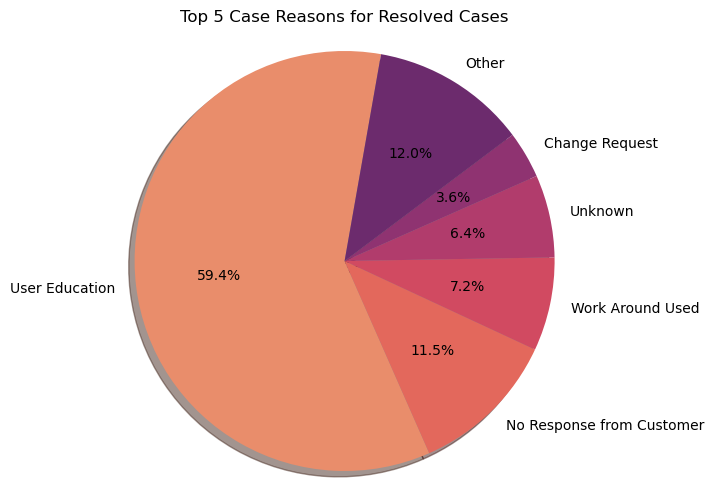

In [80]:
plt.figure(figsize = (8, 6)) 
plt.pie(top_5_case_reasons, labels = top_5_case_reasons.index, 
        autopct = '%1.1f%%', shadow = True, startangle = 80, colors = colors)
plt.axis('Equal')
plt.title("Top 5 Case Reasons for Resolved Cases")
plt.show()

In [81]:
selected_case_owners = ['David Searby', 'Johanna Whitelaw', 'Ashriel James']

filtered_data = df[df['Case Owner'].isin(selected_case_owners)]

grouped_data = filtered_data.groupby(['Case Owner', 'Status']).size().unstack(fill_value=0)

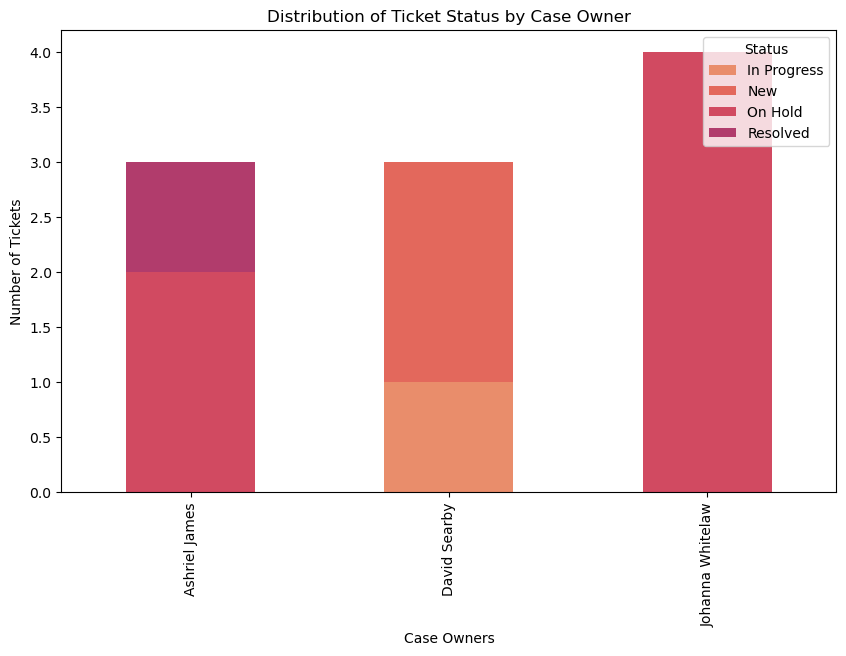

In [82]:
ax = grouped_data.plot(kind = 'bar', stacked = True, figsize = (10, 6), color = flare)
ax.set_xlabel('Case Owners')
ax.set_ylabel('Number of Tickets')
plt.title("Distribution of Ticket Status by Case Owner")
plt.legend(title = 'Status', loc = 'upper right')
plt.show()